In [1]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# visualization with python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = r'/content/drive/MyDrive/extracurricular/YBIGTA/2024년 1학기: 24대 운영진/24대 운영진/24-1 YBIGTA 공유드라이브/1. 24기 신입 교육세션/2024-1 교육세션/0116 시각화/diamonds.csv'
        df = pd.read_csv(csv_path)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [3]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

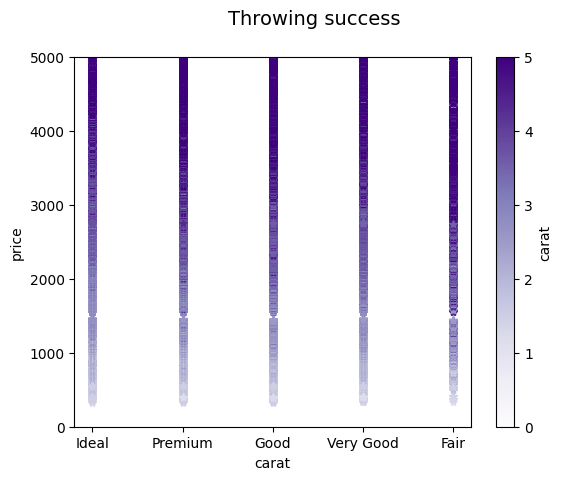

In [11]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(cut,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("carat")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [16]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

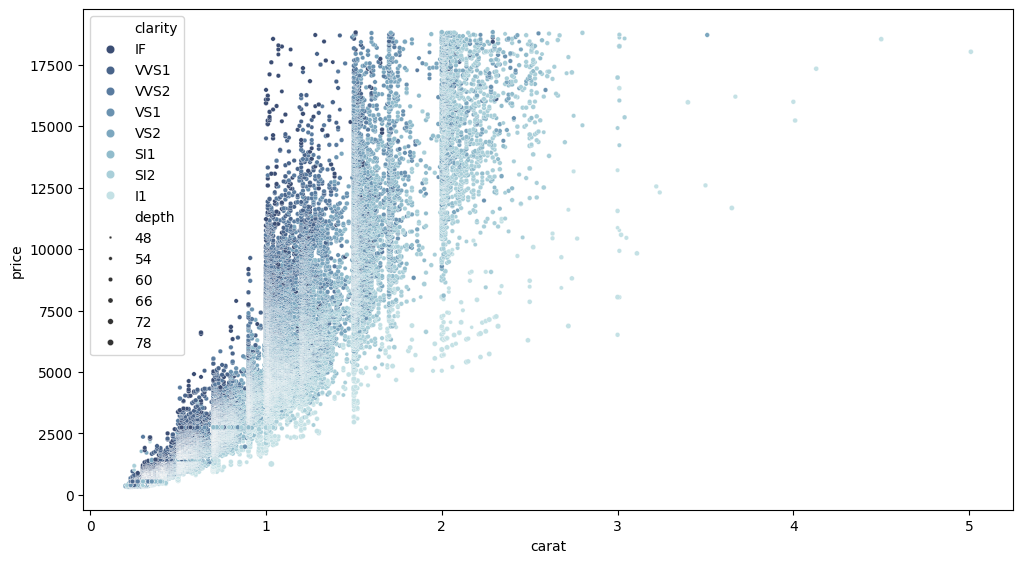

In [6]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

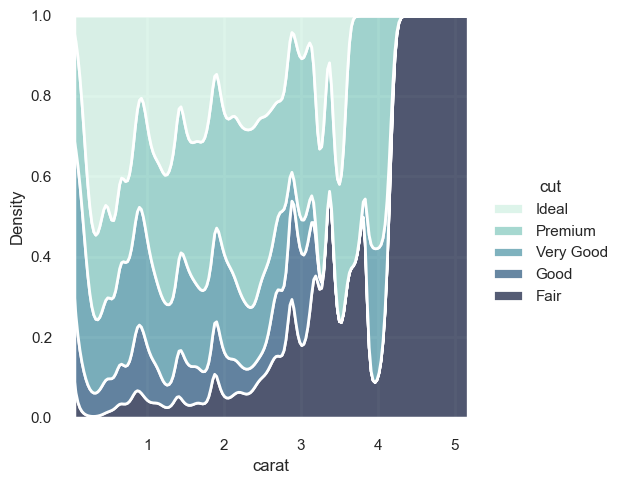

In [27]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

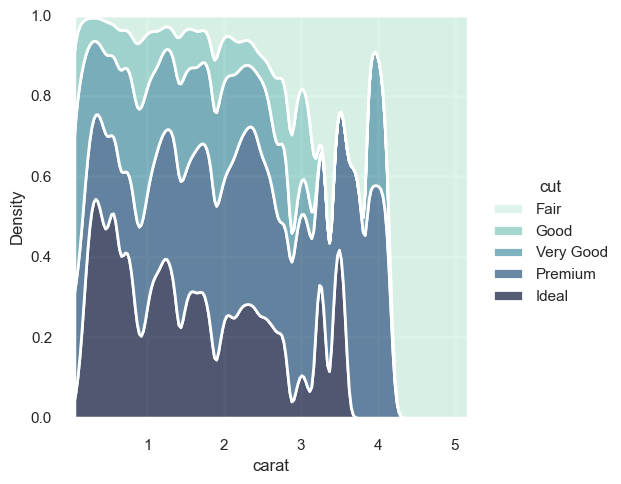

In [33]:
# Define the order of levels
levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Convert 'cut' to Categorical type with the specified order of levels
df['cut'] = pd.Categorical(df['cut'], categories=levels, ordered=True)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

In [32]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0~1', '1~2', '2~3', '3~4', '4~5']
df['carat_category'] = pd.cut(df['carat'], bins=bins, labels=labels)
grouped = df.groupby(['cut', 'carat_category']).size()
grouped

C:\Users\JW\AppData\Local\Temp\ipykernel_96388\1762625758.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['cut', 'carat_category']).size()


cut        carat_category
Ideal      0~1               15889
           1~2                5189
           2~3                 469
           3~4                   4
           4~5                   0
Premium    0~1                8062
           1~2                4986
           2~3                 730
           3~4                  11
           4~5                   2
Very Good  0~1                8201
           1~2                3493
           2~3                 386
           3~4                   2
           4~5                   0
Good       0~1                3327
           1~2                1411
           2~3                 165
           3~4                   3
           4~5                   0
Fair       0~1                 959
           1~2                 534
           2~3                 107
           3~4                   7
           4~5                   2
dtype: int64

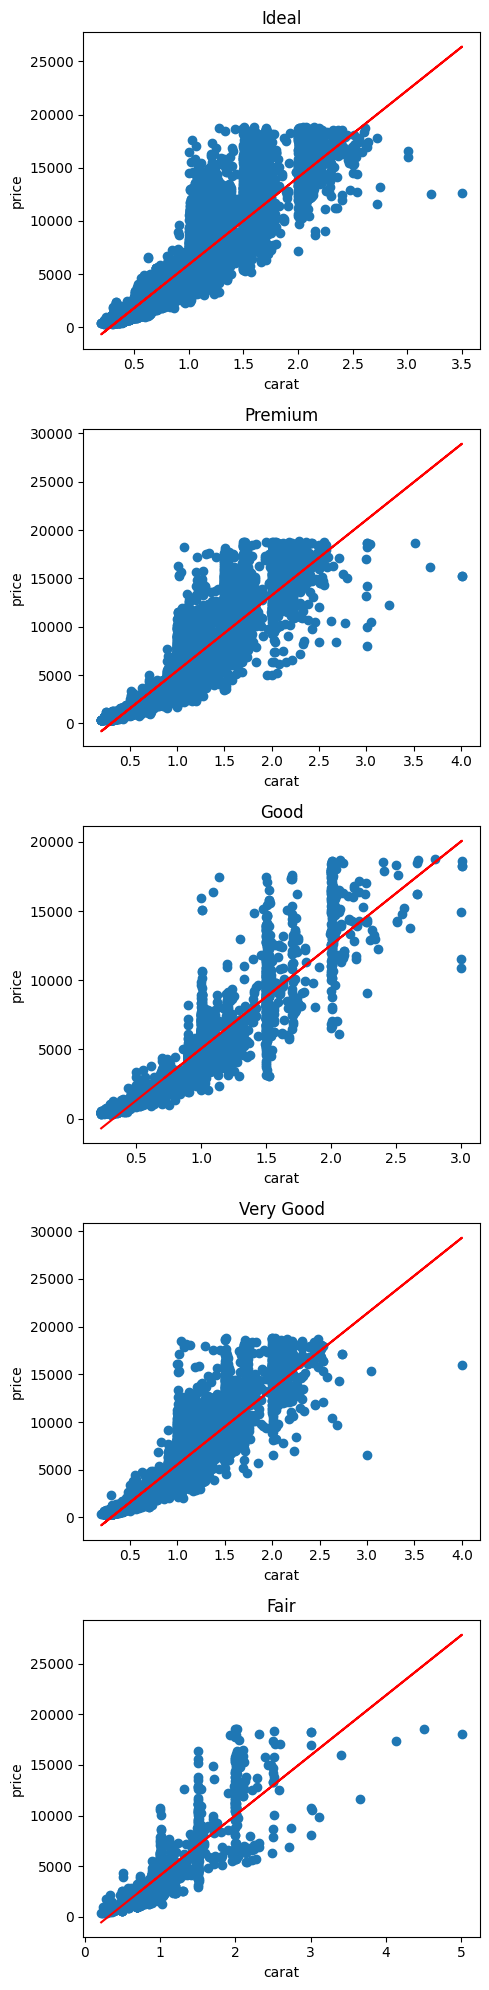

In [ ]:
# 1번에 대한 개선점
import numpy as np

cuts = df['cut'].unique()  # cut의 값들을 모두 불러옵니다. 

fig, axs = plt.subplots(len(cuts), figsize=(5, 20)) # cut의 개수만큼 subplot을 생성합니다.

for ax, cut in zip(axs, cuts): # for문을 통해 cut에 따른 carat과 price의 관계를 scatter plot으로 그립니다.
    cut_df = df[df['cut'] == cut]
    ax.scatter(cut_df['carat'], cut_df['price'])
    
    # cara와 price의 관계를 직관적으로 보이기 위해 선형회귀선을 추가합니다. 
    m, b = np.polyfit(cut_df['carat'], cut_df['price'], 1)
    ax.plot(cut_df['carat'], m*cut_df['carat'] + b, color='red')
    
    ax.set_title(cut)
    ax.set_xlabel('carat')
    ax.set_ylabel('price')

plt.tight_layout()
plt.show() # 이를 통해 기존 그래프에서 볼 수 없었던, price와 carat의 경향성을 직관적으로 확인할 수 있습니다.

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* 여기에 답을 작성해주세요.
1)
해당 시각화에 사용된 변수는 cart, cut, price세가지입니다. 따라서, 목적은 
5가지 diamond의 cut 범주내에서 
carat과 price사이의 관계를 보고자 하는 것 같습니다. 이를 통해 얻을 수 있는 결과로는 
cut에 상관없이 carat의 크기가 증가하면 price도 증가하는 양상을 보인다는 것 일 것입니다. 
하지만, 현재 그래프를 통해서는 2차원 축에 3차원 데이터를 담으려 하다 보니 증가 양상을 제대로 보이지못하는 문제가 있습니다.

따라서, 해당 시각화의 목적을 제대로 수행하기 위해서 적절한 그래프는 코드 내에서 for문을 사용하여 cut 품질에 따른 carat-price그래프를 5개를 만든 후 각각의 경향성을 직관적으로 보이는 것이 좋다고 생각합니다.  

2)
해당 시각화는 carat에 따른 price의 관계를 설명함과 동시에, 점 크기와 색을 통해  depth와 clarity를 모두 설명할 수 있는 그래프입니다.
clarity의 경우 색이 어느정도 명확하게 구분되었다고 볼 수 있지만, 전체 데이터의 개수가 많고 해당 데이터를 점으로 표현하다보니, 점의 크기로 표현되는 depth의 경우, 그 크기가 제대로 표현이 되지 않는 다는 문제가 존재합니다. "The diamond pro"등 다이아몬드의 depth를 다룬 자료를 통해 확인한 결과, depth를  현재 구분된 방식처럼 6단위로 구분하지 않으며,  어떤 cut인지, 종류인지에 따라서 56~65의 depth를 좋은 depth로서 사용합니다. 

그렇기에 현재 구분하는 방식처럼 6단위 구분이 아닌, ~56, 56~65, 65~의 삼분위 구분을 통해 점의 크기를 시각적으로 더욱 구분하기 쉽게 변형하면, 적절한 시각화를 이룰 수 있을 것입니다.
 
3) 해당 그래프는 kde 커널밀도 방식을 통해 5개의 'cut'에서 carat이 어떻게분포하고 있는지를 보여주는 그래프입니다. 또한, 이 방식을 사용한 목적은, 5개의 컷에 캐럿들은 각각 어떻게 분포하고 있을까? 에대한 고민에서 출발한 결과일 것으로 보입니다. 밀도 추정방식을사용하여 데이터 분포양상을 확인할 경우, 데이터가 많은 경우 데이터의 분포 양상을 적절하게 보여줄 수 있으며, 효과적인 방법으로 볼 수 있습니다. 다만, 우리 다이아몬드 데이터의 경우, carat이 증가함에따라서 carat의 개수가 급격하게 줄어드는 양상을 보입니다. groupby 기능을 활용하여, 캐럿을 5분위로 나누어 각각의 개수로 보았을 때 3캐럿 이상의 개수는 0~3캐럿에 비해 1퍼센트도 안되는 비중이기 때문에, 밀도추정으로 cut에 따른 데이터 분포양상을 확인하는 것은 왜곡된 결과를 낳을 수 있습니다. 가령 
3캐럿 이상이 cut에 따라 5개, 2개, 1개, 4개, 0개 이런식으로 존재한다고 할때, 이를 커널 밀도 추정그래프로 양상을 확인할 경우 3캐럿이하와는 매우 상반된 결과가 도출될  수 있다는 것입니다. 그렇기에, 데이터의 개수가 급격하게 적어지는 구간을 임의로 정한 후(기울기등으로),  해당 캐럿 이상의 경우에는, displot의 hist 혹은 누적분포를 확인하는 것이 정확한 데이터 분포 양상을 보는데에 더욱 효과적일 수 있습니다. 



2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 여기에 답을 작성해주세요.

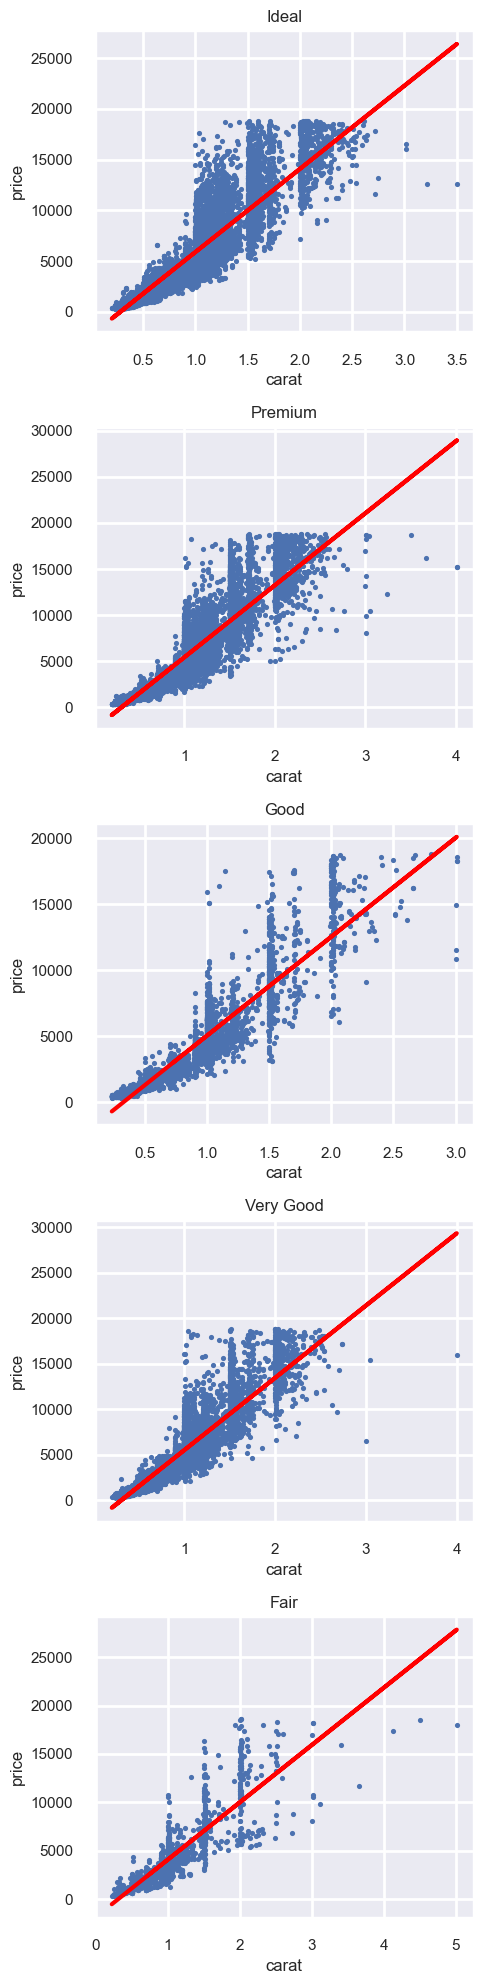

In [35]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!

# 1번 시각화에 대한 개선점
import numpy as np

cuts = df['cut'].unique()  # cut의 값들을 모두 불러옵니다. 

fig, axs = plt.subplots(len(cuts), figsize=(5, 20)) # cut의 개수만큼 subplot을 생성합니다.

for ax, cut in zip(axs, cuts): # for문을 통해 cut에 따른 carat과 price의 관계를 scatter plot으로 그립니다.
    cut_df = df[df['cut'] == cut]
    ax.scatter(cut_df['carat'], cut_df['price'],s=3)
    
    # cara와 price의 관계를 직관적으로 보이기 위해 선형회귀선을 추가합니다. 
    m, b = np.polyfit(cut_df['carat'], cut_df['price'], 1)
    ax.plot(cut_df['carat'], m*cut_df['carat'] + b, color='red')
    
    ax.set_title(cut)
    ax.set_xlabel('carat')
    ax.set_ylabel('price')

plt.tight_layout()
plt.show() # 이를 통해 기존 그래프에서 볼 수 없었던, price와 carat의 경향성을 직관적으로 확인할 수 있습니다.

# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.

In [ ]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.